In [24]:
import pandas as pd
autodata=pd.read_csv("./archive/auto-mpg.csv")

In [25]:
autodata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [26]:
autodata.shape

(398, 9)

In [27]:
autodata.fillna(0)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [28]:
autodata=autodata.replace('?',0)
autodata=autodata.fillna(0)

In [38]:
df=autodata
df[[i for i in list(df.columns) if i not in ['cylinders', 'model year','origin','car name']]]


,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130,3504,12.0
1,15.0,350.0,165,3693,11.5
2,18.0,318.0,150,3436,11.0
3,16.0,304.0,150,3433,12.0
4,17.0,302.0,140,3449,10.5
...,...,...,...,...,...
393,27.0,140.0,86,2790,15.6
394,44.0,97.0,52,2130,24.6
395,32.0,135.0,84,2295,11.6
396,28.0,120.0,79,2625,18.6


In [39]:
from sklearn.model_selection import train_test_split
training_split, testing_split = train_test_split(autodata, test_size=0.2)

In [40]:
X_train=training_split[[i for i in list(training_split.columns) if i not in ['cylinders', 'model year','origin','car name']]]

In [41]:
y_train=training_split.loc[:,['mpg']]

In [42]:
X_test=testing_split[[i for i in list(testing_split.columns) if i not in ['cylinders', 'model year','origin','car name']]]

In [43]:
y_test=testing_split.loc[:,['mpg']]

In [44]:
X_train

,mpg,displacement,horsepower,weight,acceleration
97,18.0,225.0,105,3121,16.5
70,13.0,400.0,190,4422,12.5
304,37.3,91.0,69,2130,14.7
117,29.0,68.0,49,1867,19.5
172,25.0,90.0,71,2223,16.5
...,...,...,...,...,...
323,27.9,156.0,105,2800,14.4
316,19.1,225.0,90,3381,18.7
90,12.0,429.0,198,4952,11.5
146,28.0,90.0,75,2125,14.5


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_scaled, y_train)
reg.score(X_test_scaled, y_test)

1.0

In [57]:
reg.coef_

array([[ 3.76000000e+01, -1.41787863e-14,  4.48569788e-17,
         1.07522875e-15, -7.82308729e-15]])

In [58]:
reg

LinearRegression()

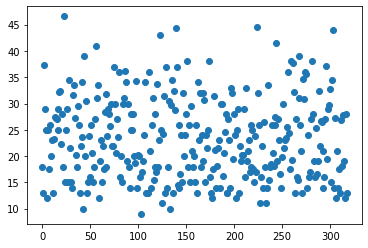

In [64]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(np.arange(318),y_train)

In [74]:
high=np.zeros(len(df))
ctr=0
for i,row in df.iterrows():
    if(row['mpg']>=23.0):
        high[ctr]=1
    else:
        high[ctr]=0
    ctr+=1

In [75]:
autodata['high']=high

In [76]:
autodata

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,high
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0.0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0.0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0.0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0.0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0.0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1.0
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1.0
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1.0
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1.0


In [77]:
from sklearn.model_selection import train_test_split
training_split, testing_split = train_test_split(autodata, test_size=0.2)

In [79]:
X_train=training_split[[i for i in list(training_split.columns) if i in ['horsepower', 'weight','year','origin']]]
y_train=training_split[[i for i in list(training_split.columns) if i in ['high']]]

In [80]:
X_test=testing_split[[i for i in list(training_split.columns) if i in ['horsepower', 'weight','year','origin']]]
y_test=testing_split[[i for i in list(training_split.columns) if i in ['high']]]

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(X_train_scaled, y_train)
reg.score(X_test_scaled, y_test)

c:\users\lokji\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.875

In [99]:
reg.predict([[8,23,100]])

array([1.])

In [85]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [86]:
y_test

,high
335,1.0
141,1.0
27,0.0
191,0.0
260,0.0
...,...
338,1.0
75,0.0
228,0.0
207,0.0
